##### Оригинальная статья:
https://www.researchgate.net/publication/350811193_UWB-gestures_a_public_dataset_of_dynamic_hand_gestures_acquired_using_impulse_radar_sensors
https://www.nature.com/articles/s41597-021-00876-0

##### Данные:
https://figshare.com/articles/dataset/A_Public_Dataset_of_Dynamic_Hand-gestures_Acquired_using_Impulse-radar_sensors_/12652592

# RNN for UWB-gestures (жесты):
<h3 style="text-align: left;"><b>Подготовил:</b> Степанюк Денис Борисович</h3>

Данные записаны на 3 СШП радара <b>" XETHRU by NOVELDA X4M02 290056-010 "</b> расположеных слева, по центру и справа.

8 волонтёров записали по ~ 100 экземпляров 12 жестов, где 12-й жест это полное отсутсвие движения, снятых с трёх ракурсов.

1 экземпляр представляет собой двумерную матрицу записаную следующим образом:
- 20 раз в секунду радар присылает вектор с данными длинной 189.
- Запись одного движения занимает 4.5 секунды.
- За 4.5 секунду радар присылает 90 векторов длинной 189
- Вектора склеивают в матрицу 90х189 чтобы получить " изображение ".

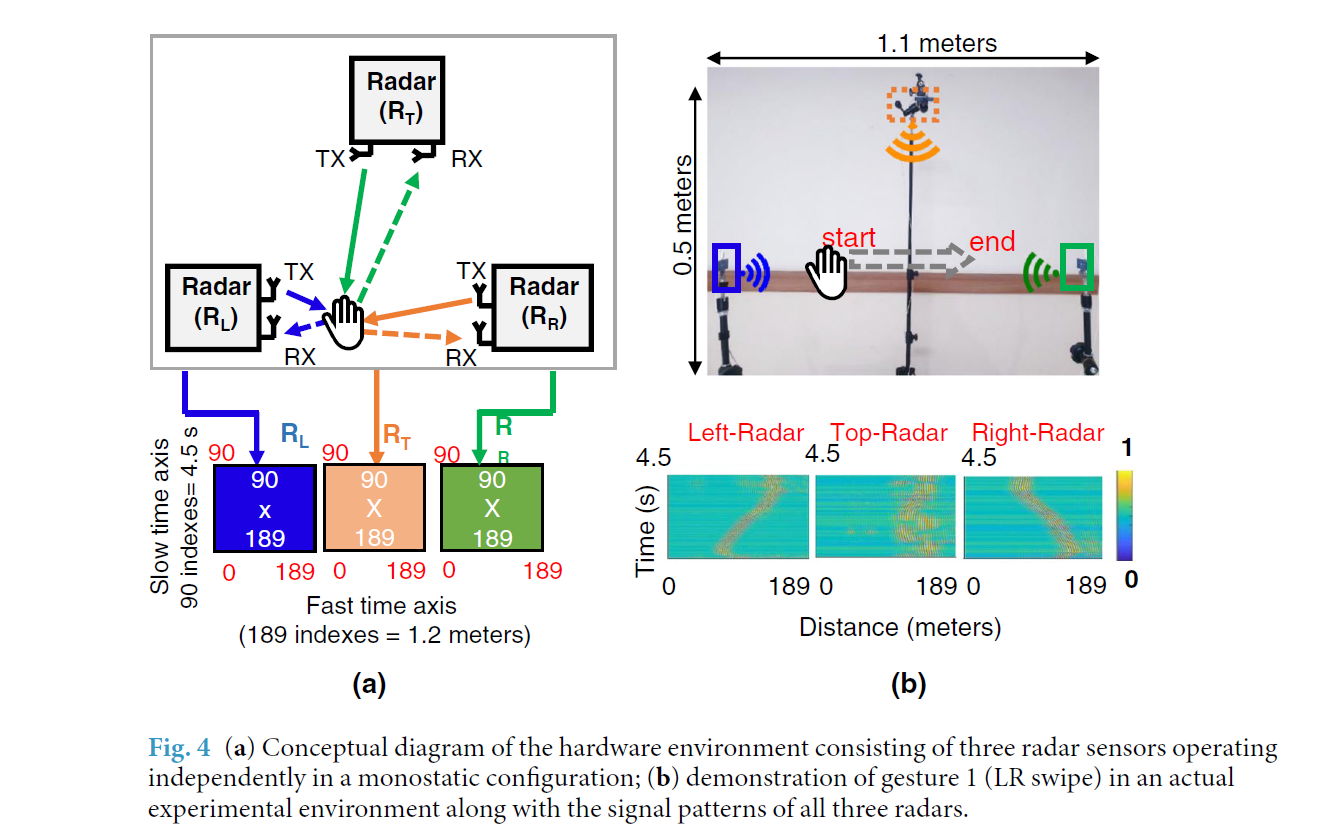

<h3 style="text-align: left;"><b>1.1 Загрузка данных:</b></h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from numpy import genfromtxt
'''
zest(x, y, z) - конвертирует CSV экземпляр записаного сигнала в 2D numpy матрицу.

person - всего 8 добровольцев приняли участие в записи данных для датасета.

nomer - каждый доброволец записал по 12 разных жестов. Для каждого жеста каждый доброволец записал по 100 экземпляров.

clean -  (True - очищенные от шумов данные / False - данные полные шумов).
'''
# Общий путь к датасету.
path = "C:\\Users\\STEPANJUK\\Desktop\\Deep Learning - Natural Language Processing\\UWB-Gestures-classification-with-CNN-main\\CSV_DataSet_Gestures\\"

def zest(path, # Общий путь к датасету.
         person, # Номер добровольца, который записывал данные (1-8).
         nomer, # Номер жеста для загрузки(1-12).
         clean, # Вид данных (True - очищенные от шумов данные / False - данные полные шумов).
         left, # Разрешение на загрузку данных с левого радара.
         center, # Разрешение на загрузку данных с центрального радара.
         right): # Разрешение на загрузку данных с правого радара.

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1:
        beta = "Removed"
    else:
        beta = "Removed_"

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    gamma = "Data_HV0"  
    if person == 3:
        gamma = "Data_HV_0"
    if person == 6:
        gamma = "HC0"   

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1 or person == 6:
        alpha = "HV_0"
    else:
        alpha = "HV0"

    # Список для данных от одного добровольца с левого радара.
    data_LeftRadar = []
    # Список для данных от одного добровольца с правого радара.
    data_RightRadar = []
    # Список для данных от одного добровольца с центрального радара.
    data_CenterRadar = []

    # Загрузить очищенные от шумов данные:
    if clean:
        # Формируем полный путь к данным от указаного добровольца с левого радара.
        path_LeftRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_ClutterRemoved_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с правого радара.
        path_RightRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_ClutterRemoved_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с центрального радара.
        path_CenterRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_ClutterRemoved_100samples.csv"
        
        # Загружаем данные с тех радаров, которые получили разрешение.
        if left:
            data_LeftRadar = genfromtxt(path_LeftRadar_clean, delimiter=',')
        if right:
            data_RightRadar = genfromtxt(path_RightRadar_clean, delimiter=',')
        if center:
            data_CenterRadar = genfromtxt(path_CenterRadar_clean, delimiter=',')

    # Загрузить данные полные шумов:
    else:
        # Формируем полный путь к данным от указаного добровольца с левого радара.
        path_LeftRadar_raw = path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_Raw_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с правого радара.
        path_RightRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_Raw_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с центрального радара.
        path_CenterRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_Raw_100samples.csv"

        # Загружаем данные с тех радаров, которые получили разрешение.
        if left:
            data_LeftRadar = genfromtxt(path_LeftRadar_raw, delimiter=',')
        if right:
            data_RightRadar = genfromtxt(path_RightRadar_raw, delimiter=',')
        if center:
            data_CenterRadar = genfromtxt(path_CenterRadar_raw, delimiter=',')

    

    return data_LeftRadar, data_RightRadar, data_CenterRadar

In [3]:
'''
Функия обьеденяет жесты от разных людей в общий массив, то есть можно обьеденить все жесты от всех людей
по категориям, по 12 массивов на каждый ракурс.
'''
def zest_upload(path, # Общий путь к датасету.
                nomer, # Номер жеста для загрузки(1-12).
                clean, # Вид данных (True - очищенные от шумов данные / False - данные полные шумов).
                left, # Разрешение на загрузку данных с левого радара.
                center, # Разрешение на загрузку данных с центрального радара.
                right): # Разрешение на загрузку данных с правого радара.
    # Список для всех данных с левого радара.
    LeftRadar_all = []
    # Список для всех данных с правого радара.
    RightRadar_all = []
    # Список для всех данных с центрального радара.
    CenterRadar_all = []

    # Пройти через данные от всех 8 добровольцев.
    for person in range(1,9):
        # Numpy матрицы со всеми данными (жестами) от одного добровольца с трёх радаров.
        LeftRadar_person, RightRadar_person, CenterRadar_person = zest(path, person, nomer, clean, left, center, right)
    
        # Меняем форму матриц с данными, которые получили разрешение на загрузку.
        if left:
            LeftRadar_person = LeftRadar_person.reshape(-1, 90, 189)
        if right:
            RightRadar_person = RightRadar_person.reshape(-1, 90, 189)
        if center:
            CenterRadar_person = CenterRadar_person.reshape(-1, 90, 189)

        # Добавляем матрицы со всеми данными (жестами) от одного добровольца к спискам с данными от всех добровольцев.
        LeftRadar_all.append(LeftRadar_person)
        RightRadar_all.append(RightRadar_person)
        CenterRadar_all.append(CenterRadar_person)


    return np.vstack(LeftRadar_all), np.vstack(RightRadar_all), np.vstack(CenterRadar_all)

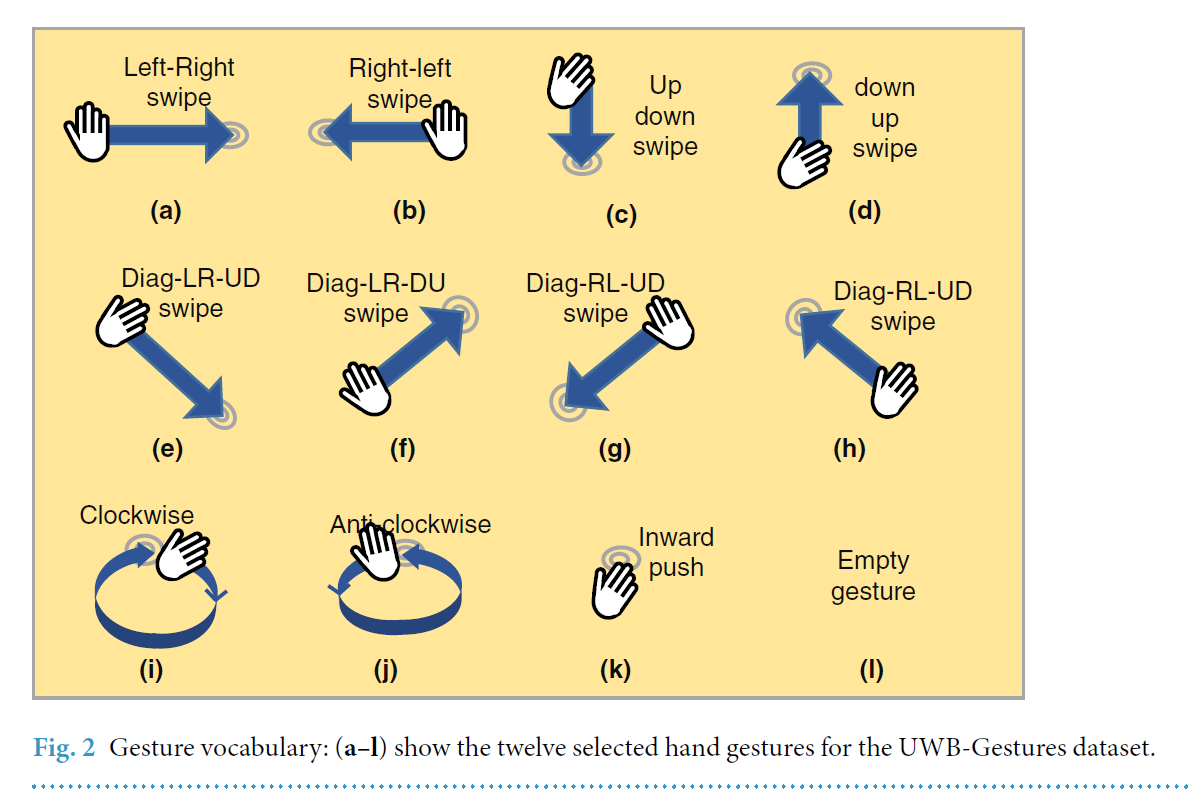

**Left-Right swipe:** ZEST_1_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Diag-RL-UD swipe:** ZEST_7_LeftRadar_clean

**Right-Left swipe:** ZEST_2_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Diag-RL-DU swipe:** ZEST_8_LeftRadar_clean

**Up-Down swipe:**    ZEST_3_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Clockwise:**        ZEST_9_LeftRadar_clean

**Down-Up swipe:**    ZEST_4_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Anti-clockwise:**   ZEST_10_LeftRadar_clean

**Diag-LR-UD swipe:** ZEST_5_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Inward push:**      ZEST_11_LeftRadar_clean

**Diag-LR-DU swipe:** ZEST_6_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Empty:**            ZEST_12_LeftRadar_clean

In [4]:
'''
Загружаем все жесты очищенные от шумов от всех добровольцев.

zest_upload(path, # Общий путь к датасету.
            nomer, # Номер жеста для загрузки(1-12).
            clean, # Вид данных (True - очищенные от шумов данные / False - данные полные шумов).
            left, # Разрешение на загрузку данных с левого радара.
            center, # Разрешение на загрузку данных с центрального радара.
            right): # Разрешение на загрузку данных с правого радара.
'''

ZEST_1_LeftRadar_clean, _, _ = zest_upload(path, 1, True, True, False, False)

ZEST_2_LeftRadar_clean, _, _ = zest_upload(path, 2, True, True, False, False)

ZEST_3_LeftRadar_clean, _, _ = zest_upload(path, 3, True, True, False, False)

ZEST_4_LeftRadar_clean, _, _ = zest_upload(path, 4, True, True, False, False)

ZEST_5_LeftRadar_clean, _, _ = zest_upload(path, 5, True, True, False, False)

ZEST_6_LeftRadar_clean, _, _ = zest_upload(path, 6, True, True, False, False)

ZEST_7_LeftRadar_clean, _, _ = zest_upload(path, 7, True, True, False, False)

ZEST_8_LeftRadar_clean, _, _ = zest_upload(path, 8, True, True, False, False)

ZEST_9_LeftRadar_clean, _, _ = zest_upload(path, 9, True, True, False, False)

ZEST_10_LeftRadar_clean, _, _ = zest_upload(path, 10, True, True, False, False)

ZEST_11_LeftRadar_clean, _, _ = zest_upload(path, 11, True, True, False, False)

ZEST_12_LeftRadar_clean, _, _ = zest_upload(path, 12, True, True, False, False)

In [5]:
print(ZEST_1_LeftRadar_clean.shape)

(800, 90, 189)


<h3 style="text-align: left;"><b>1.2 Отображение данных:</b></h3>

In [11]:
from matplotlib import pyplot as plt

# Функция для отрбражения снимка с радара.
def imshow(Radar, el, title="Radar"):
    """Imshow для тензоров"""
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 12), sharey=True, sharex=True)
    
    ax.imshow(Radar[el])
    if title is not None:
        ax.set_title(title)
    ax.grid(False)

Radar (clean): gesture


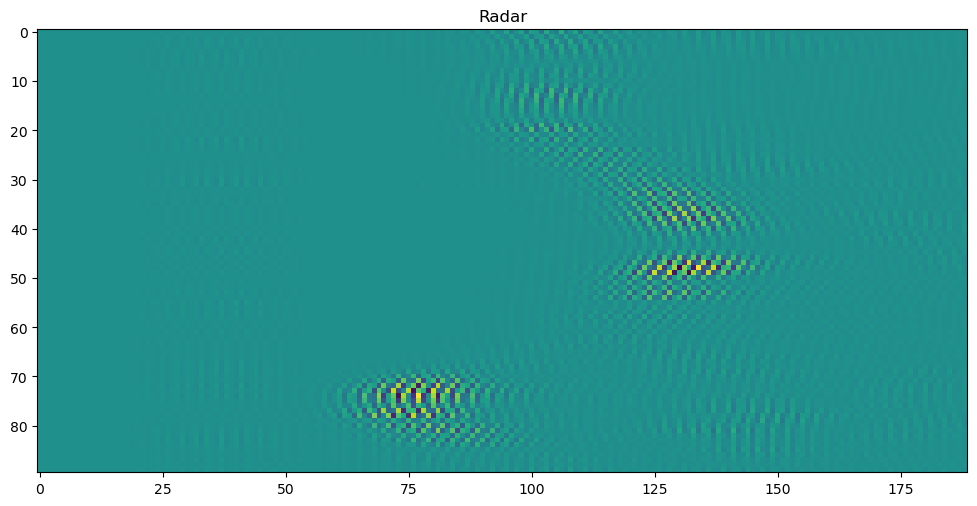

In [12]:
print("Radar (clean): gesture")
imshow(ZEST_9_LeftRadar_clean, 50)

<h3 style="text-align: left;"><b>2.1 Подготовка датасета:</b></h3>

Буду использовать только очищенные данные с левого радара.

In [13]:
# Функция принимает на вход список жестов, а возвращает список лейблов для жестов.
def prepare_Labels(Radar):
    # Создадим список с количеством снимков для каждого жеста.
    RadarShape = []
    for radar in Radar:
        RadarShape.append(radar.shape[0])
    
    # Посчитаем общее кол-во снимков всех жестов.
    RadarLenght = 0
    for i in RadarShape:
        RadarLenght += i
    
    # Матрица для записи лейблов так, чтобы каждый лейбл соответствовал по счёту своему снимку в списке жестов.
    RadarLabels = np.zeros((RadarLenght,12))

    # Индекс снимка с которого начинается новый жест в общем списке жестов.
    start_el = 0
    # Индекс последнего снимка текущего жеста в общем списке жестов.
    stop_el = 0
    # Индекс для лейбла текущего жеста.
    label = 0

    # Пройдём по каждому жесту получив кол-во снимков для него в общем списке жестов.
    for sh in range(len(RadarShape)):
        # Вектор для бинарного лейбла.
        labelArray = np.zeros(12)

        # Определим индекс последнего снимка текущего жеста
        if(sh == 0):
            stop_el += RadarShape[sh]
        else:
            # Определим индекс с которого начинается новый жест в общем списке жестов.
            start_el += RadarShape[sh-1]
            # Определим индекс последнего снимка текущего жеста
            stop_el += RadarShape[sh]
        #print(start_el, "|||", stop_el)
        # Поставим единичку в нужном месте у бинарного лейбла.
        labelArray[label] = 1
        # В списке с лейблами в нужном месте укажем бинарные лейблы для текущего жеста.
        RadarLabels[start_el:stop_el] = labelArray
        # # Индекс для лейбла текущего жеста увеличим на один.
        label += 1

    return RadarLabels 

In [14]:
# Соберу все " изображения " в один список.
LeftRadar = [
    ZEST_1_LeftRadar_clean,
    ZEST_2_LeftRadar_clean,
    ZEST_3_LeftRadar_clean,
    ZEST_4_LeftRadar_clean,
    ZEST_5_LeftRadar_clean,
    ZEST_6_LeftRadar_clean,
    ZEST_7_LeftRadar_clean,
    ZEST_8_LeftRadar_clean,
    ZEST_9_LeftRadar_clean,
    ZEST_10_LeftRadar_clean,
    ZEST_11_LeftRadar_clean,
    ZEST_12_LeftRadar_clean ]


'''
Labels   start_idx ||| stop_idx
  0              0 ||| (800 - 1)
  1            800 ||| (1600 - 1)
  2           1600 ||| (2400 - 1)
  3           2400 ||| (3193 - 1)
  4           3193 ||| (3993 - 1)
  5           3993 ||| (4793 - 1)
  6           4793 ||| (5593 - 1)
  7           5593 ||| (6393 - 1)
  8           6393 ||| (7193 - 1)
  9           7193 ||| (7993 - 1)
  10          7993 ||| (8793 - 1)
  11          8793 ||| (9593 - 1)
'''
# Получим матрицу бинарных лейблов.
LeftRadarLabels = prepare_Labels(LeftRadar)

# Из общего списка снимков жестов сделаем матрицу.
LeftRadar = np.vstack(LeftRadar)

Тип данных у бинарного лейбла: float64
Бинарный лейбл: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Форма тензора с лейблами: (9593, 12)
Форма тензора со всеми снимками с радара: (9593, 90, 189)


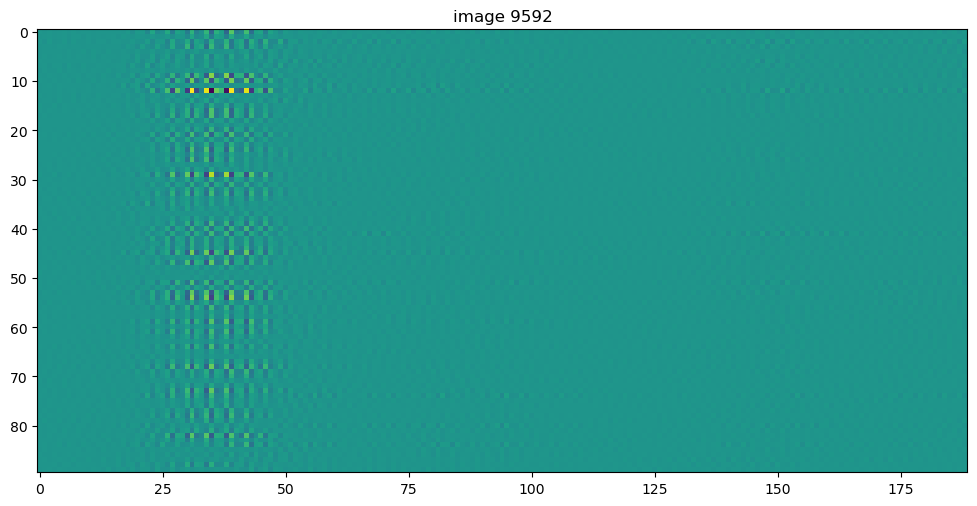

In [20]:
print(f'Тип данных у бинарного лейбла: {LeftRadarLabels[8792].dtype}')
print(f'Бинарный лейбл: {LeftRadarLabels[5591]}')
print(f'Форма тензора с лейблами: {LeftRadarLabels.shape}')
print(f'Форма тензора со всеми снимками с радара: {LeftRadar.shape}')
imshow(LeftRadar,9592, 'image 9592')

<h3 style="text-align: left;"><b>2.2 Группировка изображений по принципу train and test:</b></h3>


In [17]:
from sklearn.model_selection import train_test_split

'''
Разделим фотографии для обучающего датасета на две группы, тренировочные и тестовые.
Radar_train - 7674
Radar_test - 1919
Labels_train - 7674
Labels_test - 1919
'''
Radar_train, Radar_test, Labels_train, Labels_test = train_test_split(LeftRadar, LeftRadarLabels, test_size=0.2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


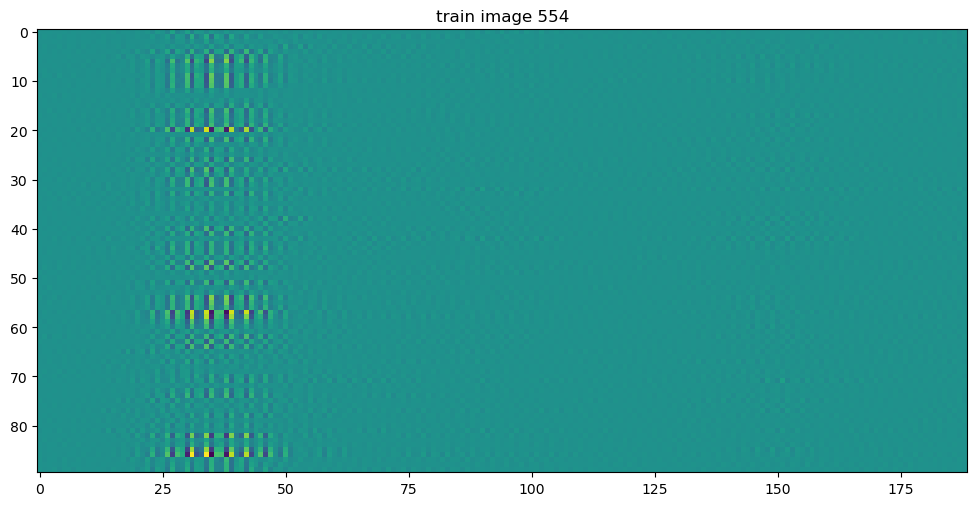

In [21]:
print(Labels_train[554])
imshow(Radar_train, 554, 'train image 554')

<h3 style="text-align: left;"><b>2.3 Подготовка даталоадеров:</b></h3>


In [25]:
from torch.utils.data import DataLoader

train_loader = DataLoader(list(zip(Radar_train.reshape(-1, 1, 90, 189), Labels_train)), batch_size=64, shuffle=True)
test_loader = DataLoader(list(zip(Radar_test.reshape(-1, 1, 90, 189), Labels_test)), batch_size=64, shuffle=True)

for images, labels in train_loader:
    print(f'Форма бача с изображениями: {images.shape}')  # Должно быть что-то вроде (batch_size, 1, 90, 189) для одноканальных изображений
    print(f'Форма бача с лейблами: {labels.shape}')
    break
    

Форма бача с изображениями: torch.Size([64, 1, 90, 189])
Форма бача с лейблами: torch.Size([64, 12])


# Шаг 3 (Создаём функции train, evaluate и history_plot):

In [26]:
import torch
import torch.nn as nn
from typing import List
from tqdm.auto import tqdm

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

# работаем на видеокарте
device = torch.device("cuda")
print('DEVICE: ', device)

CUDA is available!  Training on GPU ...
DEVICE:  cuda


In [27]:
def evaluate(model, criterion, eval_dataloader) -> float:
    """
    Calculate accuracy on validation dataloader.
    """
    # Переводим модель в режим для оценки предсказаний
    model.eval()
    val_loss = 0

    # Без расчёта производных.
    with torch.no_grad():
        # Пройти по бачам валидационного даталоадера.
        for batch in tqdm(eval_dataloader, desc=f'Validation epoch'):
            # Распакуем батч, получим данные из него.
            images, labels = batch
            # Передадим данные в модель, посчитаем логиты предсказаний для всех классов.
            logits = model(images.reshape(-1, 90, 189).to(torch.float32).to(device))
            #binary_logits = logits.argmax(dim=-1).to(device)

            # Индексы предсказаных классов (от 0 до 11).
            idx = logits.argmax(dim=1)
            # Создаем нулевой тензор той же формы, что и logits.
            binary_logits = torch.zeros_like(logits, dtype=torch.int64).to(device)
            # По индексу на место предсказаного класса ставив '1' в нулевой тензор.
            for i, bl in enumerate(binary_logits):
                bl[idx[i]] = 1

            # Расчитать функцию потерь "CrossEntropyLoss"
            vloss = criterion(logits, labels.to(device))

            # Сумма значений функции потерь для валидационных данных.
            val_loss += vloss.item() 
        
        # Сохранить значения функции потерь "CrossEntropyLoss"  для текущей эпохи.
        history_valid_loss = (val_loss / len(eval_dataloader))
        # Сохранить значения метрики accuracy для текущей эпохи.
        history_valid_acc = (binary_logits == labels.to(device)).float().mean().item()

        return history_valid_loss, history_valid_acc

In [28]:
def train(
        model: nn.Module,         # Модель
        criterion: nn.Module,     # Функция потерь
        optimizer: torch.optim.Optimizer, # оптимизатор 
        num_epochs: int,          # Кол-во эпох
        train_loader: DataLoader, # Тренировочные данные
        val_loader: DataLoader,   # Валидационные данные
        device=device, # устройство на котором производятся рассчёты
        scheduler = torch.optim.lr_scheduler.LambdaLR, # планировщик уменьшения коэфицента LR
        scheduler_step = 5, # Шаг уменьшения коэфицента LR по эпохам.
        ) -> [List[float], List[float]]:

    # Список CrossEntropyLoss для всех эпох.
    history_loss = {'train':[], 'valid':[]}
    # Список метрики accuracy для всех эпох.
    history_acc = {'train':[], 'valid':[]}

    # Пройти по эпохам.
    for epoch in range(num_epochs):
        # Переводим модель в режим для обучения
        model.train()
        # Сумма значений функции потерь для тренировочных данных.
        tr_loss = 0

        # Пройти по бачам тренировочного даталоадера.
        for i, batch in enumerate(tqdm(train_loader, desc=f'Training epoch {epoch}')):
            # Обнулим производные.
            optimizer.zero_grad()

            # Распакуем батч, получим данные из него.
            images, labels = batch
            
            # Передадим данные в модель, посчитаем логиты предсказаний для всех классов.
            logits = model(images.reshape(-1, 90, 189).to(torch.float32).to(device))
            # Индексы предсказаных классов (от 0 до 11).
            idx = logits.argmax(dim=1)
            # Создаем нулевой тензор той же формы, что и logits.
            binary_logits = torch.zeros_like(logits, dtype=torch.int64).to(device)
            # По индексу на место предсказаного класса ставив '1' в нулевой тензор.
            for i, bl in enumerate(binary_logits):
                bl[idx[i]] = 1

            # Расчитать функцию потерь "CrossEntropyLoss"
            loss = criterion(logits, labels.to(device))

            # Сумма значений функции потерь для тренировочных данных.
            tr_loss += loss.item()
            
            # Расчитать производные.
            loss.backward()
            # Сделать шаг обучения.
            optimizer.step()
            
        # Уменьшение коэфицента LR.
        if (epoch+1) % scheduler_step == 0 and scheduler is not None:
            print(f'EPOCH {epoch+1} Scheduler LR', optimizer.param_groups[0]["lr"])
            scheduler.step()

        # Сохранить значения функции потерь "CrossEntropyLoss"  для текущей эпохи.
        history_loss['train'].append(tr_loss / len(train_loader))
        # Сохранить значения метрики accuracy для текущей эпохи.
        history_acc['train'].append((binary_logits == labels.to(device)).float().mean().item())

        # Переводим модель в режим для оценки предсказаний
        model.eval()
        # Проводим оценку модели.
        history_valid_loss, history_valid_acc = evaluate(model, criterion, val_loader)

        # Сохранить значения функции потерь "CrossEntropyLoss"  для текущей эпохи.
        history_loss['valid'].append(history_valid_loss)
        # Сохранить значения метрики accuracy для текущей эпохи.
        history_acc['valid'].append(history_valid_acc)

        print('EPOCH {}:'.format(epoch + 1), "\n*TRAIN loss:", tr_loss / len(train_loader),
                  "*TRAIN Accuracy:", (binary_logits == labels.to(device)).float().mean().item(),
                  "\n*EVAL loss:", history_valid_loss,
                  "*EVAL Accuracy:", history_valid_acc,
                  '\n','-'*100)
    return history_loss, history_acc

### Функция для отображения графика обучения.

In [29]:
def history_plot(history_loss, history_acc, name):
    print(f"Лучшая accuracy на валидации: {(max(history_acc['valid']) * 100):.2f}")
    fig, ax = plt.subplots(1,2, figsize=(15, 5))

    ax[0].plot(history_loss['train'], label="train_loss",color='orange')
    ax[0].plot(history_loss['valid'], label="val_loss",color='green')
    ax[0].legend(['train', 'valid'])
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel("loss")
    plt.grid()

    ax[1].plot(history_acc['train'], label="train_acc",color='orange')
    ax[1].plot(history_acc['valid'], label="val_acc",color='green')
    ax[1].legend(['train', 'valid'])
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel("accuracy")
    plt.grid()

    fig.suptitle(f'History of "{name}" model')
    plt.show()

# Шаг 4 (Модель):

### Общая структура модели:

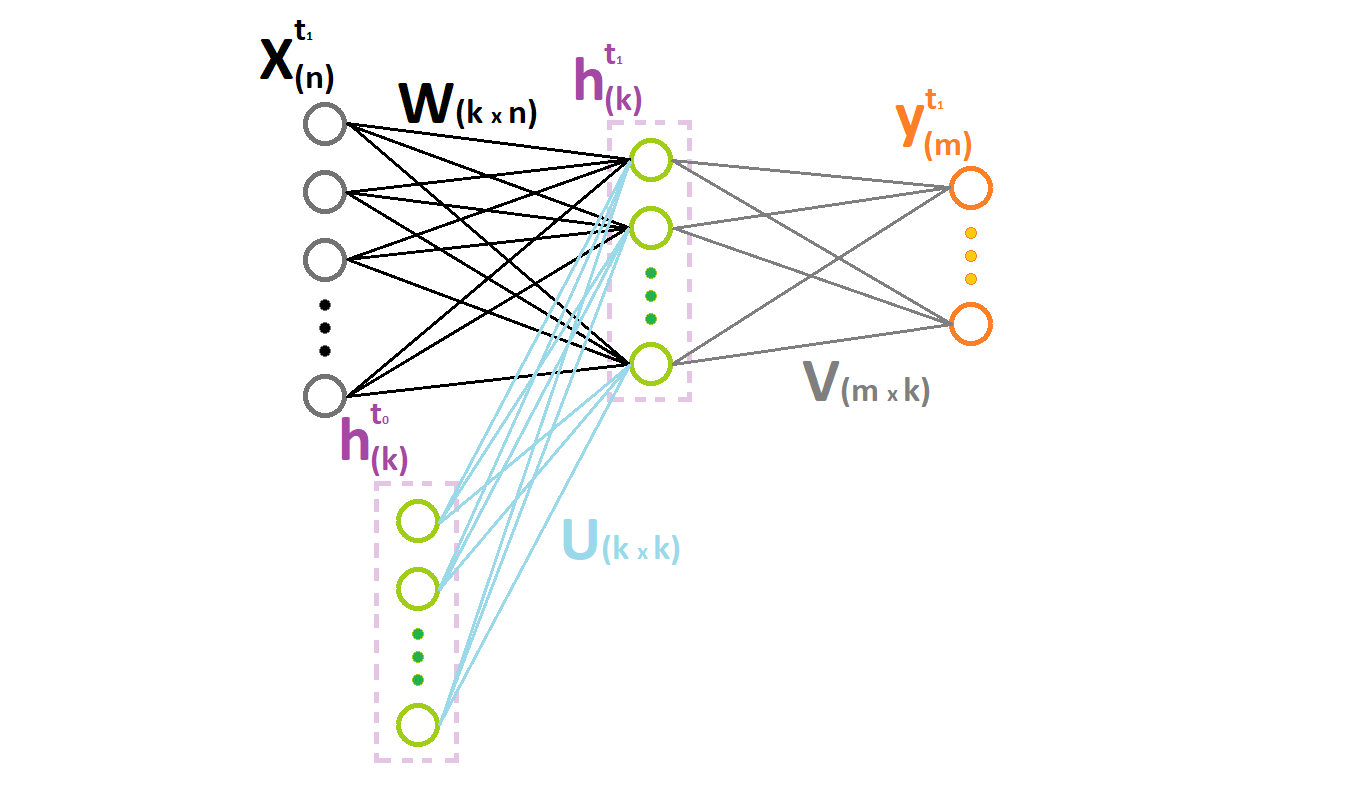

In [31]:
class RNN_UWB_Model(nn.Module):
    
    def __init__(self,
                 input_dim: int = 189,     # входная размерность.
                 hidden_dim: int = 512,    # скрытая размерность.
                 num_classes: int = 12,    # Кол-во классов для предсказания.
                 num_rnn_layers: int = 1,  # Кол-во рекуррентных слоев модели. 
                 p_dropout: float = 0.1,   # Вероятность обнуления для каждого элемента входного тензора слоя nn.Dropout.
                 rnn_type: str = 'rnn',    # Тип rnn слоя.
                 isBidirectional = False,  # Реккурентный слой двунаправленный ?
                 aggregation_type: str = 'max'): # Тип агрегации скрытых слоёв.
        
        super().__init__()
        
        # Рекуррентный блок.
        # На входе вектор слова (входная скрытая размерность), на выходе скрытый слой (выходная скрытая размерность), 
        # а так же кол-во рекуррентных слоев модели. 
        if rnn_type == 'rnn':
            self.rnn = nn.RNN(input_dim, hidden_dim, num_layers=num_rnn_layers, batch_first=True, bidirectional=isBidirectional)
        elif rnn_type == 'gru':
            self.rnn = nn.GRU(input_dim, hidden_dim, num_layers=num_rnn_layers, batch_first=True, bidirectional=isBidirectional)
        elif rnn_type == 'lstm':
            self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_rnn_layers, batch_first=True, bidirectional=isBidirectional)
        else:
            raise ValueError("Invalid rnn_type")
        
        # Линейный слой, если реккурентный слой двунаправленный.
        if isBidirectional:
            self.linear = nn.Linear(2 * hidden_dim, hidden_dim)
        # Линейный слой, если реккурентный слой однонаправленный.
        else:
            self.linear = nn.Linear(hidden_dim, hidden_dim)
            
        # Предсказывающий линейный слой.
        self.projection = nn.Linear(hidden_dim, num_classes)
        
        # Функция активации.
        self.non_lin = nn.Tanh()
        
        # Dropout - методом регуляризации и предотвращения коадаптации нейронов 
        self.dropout = nn.Dropout(p = p_dropout)
        
        # Тип агрегации скрытых слоёв
        self.aggregation_type = aggregation_type

    # Получаем входной батч.
    def forward(self, input_batch) -> torch.Tensor:
        # 
        output, _ = self.rnn(input_batch)  # [batch_size, seq_len, hidden_dim]

        if self.aggregation_type == 'max':
            output = output.max(dim=1)[0] #[batch_size, hidden_dim]
        elif self.aggregation_type == 'mean':
            output = output.mean(dim=1)[0] #[batch_size, hidden_dim]
        else:
            raise ValueError("Invalid aggregation_type")

        output = self.dropout(self.linear(self.non_lin(output)))  # [batch_size, hidden_dim]
        
        prediction = self.projection(self.non_lin(output))  # [batch_size, num_classes]

        return prediction

# RNN:

### Создадим экзепмляр модели.

In [32]:
model_Basic_RNN = RNN_UWB_Model(
                                input_dim = 189,     # входная размерность.
                                hidden_dim = 512,    # скрытая размерность.
                                num_classes = 12,    # Кол-во классов для предсказания.
                                num_rnn_layers = 1,  # Кол-во рекуррентных слоев модели. 
                                p_dropout = 0.1,     # Вероятность обнуления для каждого элемента входного тензора слоя nn.Dropout.
                                rnn_type = 'rnn',    # Тип rnn слоя.
                                isBidirectional = False,  # Реккурентный слой двунаправленный ?
                                aggregation_type = 'max').to(device) # Тип агрегации скрытых слоёв.

# Функция потерь "CrossEntropyLoss".
criterion_Basic_RNN = nn.CrossEntropyLoss()

LR = 0.001
# Коэфицент уменьшения LR по эпохам.
SCHEDULER_LAMBDA_PARAM = 0.9
# Оптимизатор.
optimizer_Basic_RNN = torch.optim.Adam(model_Basic_RNN.parameters(), lr=LR)
# Планировщик уменьшения коэфицента LR.
lambda_scheduler = lambda x: SCHEDULER_LAMBDA_PARAM ** x
scheduler_Basic_RNN = torch.optim.lr_scheduler.LambdaLR(optimizer_Basic_RNN, lr_lambda=lambda_scheduler)

### Обучим модель.

In [33]:
epochs = 50

losses_Basic_RNN, accuracies_Basic_RNN = train( model = model_Basic_RNN,         # Модель
                                                criterion = criterion_Basic_RNN,     # Функция потерь
                                                optimizer = optimizer_Basic_RNN, # оптимизатор 
                                                num_epochs = epochs,          # Кол-во эпох
                                                train_loader = train_loader, # Тренировочные данные
                                                val_loader = test_loader,    # Валидационные данные
                                                scheduler = scheduler_Basic_RNN, # планировщик уменьшения коэфицента LR
                                                scheduler_step = 1) # Шаг уменьшения коэфицента LR по эпохам.

Training epoch 0:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 1 Scheduler LR 0.001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 1: 
*TRAIN loss: 2.5345439820179725 *TRAIN Accuracy: 0.8563218116760254 
*EVAL loss: 2.216972940586625 *EVAL Accuracy: 0.8597883582115173 
 ----------------------------------------------------------------------------------------------------


Training epoch 1:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 2 Scheduler LR 0.0009000000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 2: 
*TRAIN loss: 2.5542880489338384 *TRAIN Accuracy: 0.8333333134651184 
*EVAL loss: 2.5656038560150636 *EVAL Accuracy: 0.8544973134994507 
 ----------------------------------------------------------------------------------------------------


Training epoch 2:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 3 Scheduler LR 0.0008100000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 3: 
*TRAIN loss: 2.4702263615514295 *TRAIN Accuracy: 0.8678160905838013 
*EVAL loss: 2.3741207163633713 *EVAL Accuracy: 0.8624338507652283 
 ----------------------------------------------------------------------------------------------------


Training epoch 3:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 4 Scheduler LR 0.0007290000000000002


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 4: 
*TRAIN loss: 2.3075560415794385 *TRAIN Accuracy: 0.8620689511299133 
*EVAL loss: 2.18438033431081 *EVAL Accuracy: 0.8518518209457397 
 ----------------------------------------------------------------------------------------------------


Training epoch 4:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 5 Scheduler LR 0.0006561000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 5: 
*TRAIN loss: 2.2070533591025874 *TRAIN Accuracy: 0.8706896305084229 
*EVAL loss: 2.1429864606691926 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 5:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 6 Scheduler LR 0.00059049


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 6: 
*TRAIN loss: 2.091709120257894 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 2.03855016345821 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 6:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 7 Scheduler LR 0.000531441


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 7: 
*TRAIN loss: 2.024773605237581 *TRAIN Accuracy: 0.8706896305084229 
*EVAL loss: 1.9960916754050506 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 7:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 8 Scheduler LR 0.0004782969000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 8: 
*TRAIN loss: 2.0114211764593573 *TRAIN Accuracy: 0.8706896305084229 
*EVAL loss: 1.9816107249288712 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 8:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 9 Scheduler LR 0.0004304672100000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 9: 
*TRAIN loss: 1.9738409321051829 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.9503172148472727 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 9:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 10 Scheduler LR 0.0003874204890000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 10: 
*TRAIN loss: 1.9387895570731564 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.869007131214489 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 10:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 11 Scheduler LR 0.0003486784401000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 11: 
*TRAIN loss: 1.8798471208435152 *TRAIN Accuracy: 0.8678160905838013 
*EVAL loss: 1.8571344018161724 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 11:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 12 Scheduler LR 0.0003138105960900001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 12: 
*TRAIN loss: 1.8460740394944835 *TRAIN Accuracy: 0.8706896305084229 
*EVAL loss: 1.8558762766492598 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 12:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 13 Scheduler LR 0.0002824295364810001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 13: 
*TRAIN loss: 1.8443425485612048 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.8110373995539415 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 13:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 14 Scheduler LR 0.0002541865828329001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 14: 
*TRAIN loss: 1.7982264032129107 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.7993812985675441 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 14:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 15 Scheduler LR 0.0002287679245496101


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 15: 
*TRAIN loss: 1.7834655560922559 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.7605443172404425 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 15:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 16 Scheduler LR 0.0002058911320946491


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 16: 
*TRAIN loss: 1.7715074470463235 *TRAIN Accuracy: 0.8678160905838013 
*EVAL loss: 1.7656436179067307 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 16:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 17 Scheduler LR 0.00018530201888518417


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 17: 
*TRAIN loss: 1.7319491452737859 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7126901829421517 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 17:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 18 Scheduler LR 0.00016677181699666576


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 18: 
*TRAIN loss: 1.6957963852113815 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6793725134027204 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 18:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 19 Scheduler LR 0.00015009463529699917


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 19: 
*TRAIN loss: 1.6826567080777959 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6603368062950996 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 19:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 20 Scheduler LR 0.0001350851717672993


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 20: 
*TRAIN loss: 1.6494638853230554 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.6329865850743814 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 20:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 21 Scheduler LR 0.00012157665459056935


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 21: 
*TRAIN loss: 1.6224830533180623 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.60321271494844 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 21:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 22 Scheduler LR 0.00010941898913151242


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 22: 
*TRAIN loss: 1.6035571515580558 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.6188360941635442 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 22:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 23 Scheduler LR 9.847709021836118e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 23: 
*TRAIN loss: 1.5914812949813075 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.5721168435731825 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 23:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 24 Scheduler LR 8.862938119652506e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 24: 
*TRAIN loss: 1.5760493074752018 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.5596197363452693 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 24:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 25 Scheduler LR 7.976644307687256e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 25: 
*TRAIN loss: 1.5542568149928429 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.5372624974995026 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 25:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 26 Scheduler LR 7.17897987691853e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 26: 
*TRAIN loss: 1.5449165929473827 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.5299841551289235 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 26:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 27 Scheduler LR 6.461081889226677e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 27: 
*TRAIN loss: 1.527161956666758 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.510647272101139 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 27:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 28 Scheduler LR 5.8149737003040094e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 28: 
*TRAIN loss: 1.5162851812692386 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.5454192660320563 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 28:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 29 Scheduler LR 5.233476330273609e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 29: 
*TRAIN loss: 1.514758609172337 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.5263972337360472 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 29:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 30 Scheduler LR 4.7101286972462485e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 30: 
*TRAIN loss: 1.5073693394258514 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.5055420384390148 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 30:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 31 Scheduler LR 4.239115827521624e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 31: 
*TRAIN loss: 1.500795785537466 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4939481323805734 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 31:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 32 Scheduler LR 3.8152042447694614e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 32: 
*TRAIN loss: 1.4867725398250649 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4849136475574658 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 32:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 33 Scheduler LR 3.433683820292515e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 33: 
*TRAIN loss: 1.477389485916593 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.48327155637237 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 33:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 34 Scheduler LR 3.090315438263264e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 34: 
*TRAIN loss: 1.468951876797655 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.4669409183803799 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 34:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 35 Scheduler LR 2.7812838944369376e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 35: 
*TRAIN loss: 1.4639790232558088 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4676515333473967 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 35:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 36 Scheduler LR 2.5031555049932436e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 36: 
*TRAIN loss: 1.4606414649449557 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4616280942117714 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 36:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 37 Scheduler LR 2.2528399544939195e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 37: 
*TRAIN loss: 1.4525249155167017 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4564458241349298 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 37:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 38 Scheduler LR 2.0275559590445276e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 38: 
*TRAIN loss: 1.4480039260264528 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4537064574139313 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 38:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 39 Scheduler LR 1.824800363140075e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 39: 
*TRAIN loss: 1.4427630568566483 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.446617381464106 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 39:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 40 Scheduler LR 1.6423203268260675e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 40: 
*TRAIN loss: 1.4398525849568133 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4439301252862187 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 40:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 41 Scheduler LR 1.4780882941434608e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 41: 
*TRAIN loss: 1.4455806642996238 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.465334939718722 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 41:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 42 Scheduler LR 1.3302794647291146e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 42: 
*TRAIN loss: 1.4489238635626998 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.4443816934777216 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 42:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 43 Scheduler LR 1.1972515182562033e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 43: 
*TRAIN loss: 1.4404372767259264 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.438270194748575 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 43:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 44 Scheduler LR 1.077526366430583e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 44: 
*TRAIN loss: 1.4374893938724052 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.4370995983125232 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 44:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 45 Scheduler LR 9.697737297875246e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 45: 
*TRAIN loss: 1.4341133976656353 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4334054907444167 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 45:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 46 Scheduler LR 8.727963568087722e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 46: 
*TRAIN loss: 1.4294157711284043 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4345346063036082 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 46:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 47 Scheduler LR 7.85516721127895e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 47: 
*TRAIN loss: 1.4283937708483478 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4316004520854986 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 47:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 48 Scheduler LR 7.069650490151056e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 48: 
*TRAIN loss: 1.4259265623957116 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.428723000659436 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 48:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 49 Scheduler LR 6.36268544113595e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 49: 
*TRAIN loss: 1.4242942894582475 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4262748264988192 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 49:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 50 Scheduler LR 5.726416897022355e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 50: 
*TRAIN loss: 1.4225015428476404 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4270108492915008 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


### История обучения

Лучшая accuracy на валидации: 92.86


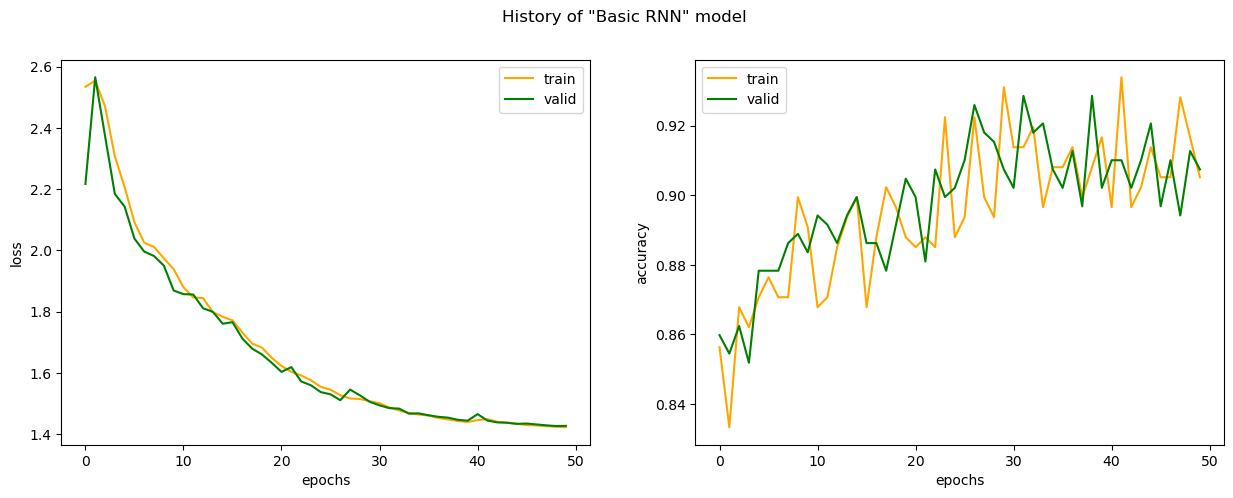

In [34]:
history_plot(losses_Basic_RNN, accuracies_Basic_RNN, 'Basic RNN')

### GRU:

### Создадим экзепмляр модели.

In [35]:
model_Basic_GRU = RNN_UWB_Model(
                                input_dim = 189,     # входная размерность.
                                hidden_dim = 512,    # скрытая размерность.
                                num_classes = 12,    # Кол-во классов для предсказания.
                                num_rnn_layers = 1,  # Кол-во рекуррентных слоев модели. 
                                p_dropout = 0.1,     # Вероятность обнуления для каждого элемента входного тензора слоя nn.Dropout.
                                rnn_type = 'gru',    # Тип rnn слоя.
                                isBidirectional = False,  # Реккурентный слой двунаправленный ?
                                aggregation_type = 'max').to(device) # Тип агрегации скрытых слоёв.

# Функция потерь "CrossEntropyLoss".
criterion_Basic_GRU = nn.CrossEntropyLoss()

LR = 0.001
# Коэфицент уменьшения LR по эпохам.
SCHEDULER_LAMBDA_PARAM = 0.9
# Оптимизатор.
optimizer_Basic_GRU = torch.optim.Adam(model_Basic_GRU.parameters(), lr=LR)
# Планировщик уменьшения коэфицента LR.
lambda_scheduler = lambda x: SCHEDULER_LAMBDA_PARAM ** x
scheduler_Basic_GRU = torch.optim.lr_scheduler.LambdaLR(optimizer_Basic_GRU, lr_lambda=lambda_scheduler)

### Обучим модель.

In [36]:
epochs = 50

losses_Basic_GRU, accuracies_Basic_GRU = train( model = model_Basic_GRU,         # Модель
                                                criterion = criterion_Basic_GRU,     # Функция потерь
                                                optimizer = optimizer_Basic_GRU, # оптимизатор 
                                                num_epochs = epochs,          # Кол-во эпох
                                                train_loader = train_loader, # Тренировочные данные
                                                val_loader = test_loader,    # Валидационные данные
                                                scheduler = scheduler_Basic_GRU, # планировщик уменьшения коэфицента LR
                                                scheduler_step = 1) # Шаг уменьшения коэфицента LR по эпохам.

Training epoch 0:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 1 Scheduler LR 0.001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 1: 
*TRAIN loss: 2.1645599856767963 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.9695078046294545 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 1:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 2 Scheduler LR 0.0009000000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 2: 
*TRAIN loss: 1.8252149842074676 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.64322160177979 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 2:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 3 Scheduler LR 0.0008100000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 3: 
*TRAIN loss: 1.5116844631764421 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.41694697150942 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 3:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 4 Scheduler LR 0.0007290000000000002


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 4: 
*TRAIN loss: 1.2837079748064584 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.2724623260799461 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 4:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 5 Scheduler LR 0.0006561000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 5: 
*TRAIN loss: 1.1038651348233586 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.074604226312649 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 5:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 6 Scheduler LR 0.00059049


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 6: 
*TRAIN loss: 0.9565369529703518 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 0.9667271159896667 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 6:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 7 Scheduler LR 0.000531441


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 7: 
*TRAIN loss: 0.8539193344071531 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 0.9206623649021134 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 7:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 8 Scheduler LR 0.0004782969000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 8: 
*TRAIN loss: 0.7569559596453979 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 0.8448964174116181 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 8:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 9 Scheduler LR 0.0004304672100000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 9: 
*TRAIN loss: 0.6745985035699501 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 0.7816629966586778 *EVAL Accuracy: 0.9497354030609131 
 ----------------------------------------------------------------------------------------------------


Training epoch 9:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 10 Scheduler LR 0.0003874204890000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 10: 
*TRAIN loss: 0.6006335412477074 *TRAIN Accuracy: 0.9683908224105835 
*EVAL loss: 0.7517018887407101 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 10:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 11 Scheduler LR 0.0003486784401000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 11: 
*TRAIN loss: 0.5436955788610607 *TRAIN Accuracy: 0.9683908224105835 
*EVAL loss: 0.7414666186547859 *EVAL Accuracy: 0.952380895614624 
 ----------------------------------------------------------------------------------------------------


Training epoch 11:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 12 Scheduler LR 0.0003138105960900001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 12: 
*TRAIN loss: 0.48628049364808273 *TRAIN Accuracy: 0.9741379022598267 
*EVAL loss: 0.6367993477594006 *EVAL Accuracy: 0.9629629254341125 
 ----------------------------------------------------------------------------------------------------


Training epoch 12:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 13 Scheduler LR 0.0002824295364810001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 13: 
*TRAIN loss: 0.43877262861710925 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 0.6639832196260411 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 13:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 14 Scheduler LR 0.0002541865828329001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 14: 
*TRAIN loss: 0.41240142545762926 *TRAIN Accuracy: 0.9741379022598267 
*EVAL loss: 0.595371943903009 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 14:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 15 Scheduler LR 0.0002287679245496101


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 15: 
*TRAIN loss: 0.38298135717690956 *TRAIN Accuracy: 0.977011501789093 
*EVAL loss: 0.5814935298037007 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 15:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 16 Scheduler LR 0.0002058911320946491


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 16: 
*TRAIN loss: 0.35752161193975335 *TRAIN Accuracy: 0.9712643623352051 
*EVAL loss: 0.5783315213675766 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 16:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 17 Scheduler LR 0.00018530201888518417


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 17: 
*TRAIN loss: 0.3299385964157481 *TRAIN Accuracy: 0.977011501789093 
*EVAL loss: 0.5612892553532631 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 17:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 18 Scheduler LR 0.00016677181699666576


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 18: 
*TRAIN loss: 0.31758719337009234 *TRAIN Accuracy: 0.977011501789093 
*EVAL loss: 0.5562220560940558 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 18:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 19 Scheduler LR 0.00015009463529699917


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 19: 
*TRAIN loss: 0.29052659648258916 *TRAIN Accuracy: 0.9798850417137146 
*EVAL loss: 0.5539748643581556 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 19:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 20 Scheduler LR 0.0001350851717672993


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 20: 
*TRAIN loss: 0.27520518103075015 *TRAIN Accuracy: 0.9798850417137146 
*EVAL loss: 0.5535519746054497 *EVAL Accuracy: 0.978835940361023 
 ----------------------------------------------------------------------------------------------------


Training epoch 20:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 21 Scheduler LR 0.00012157665459056935


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 21: 
*TRAIN loss: 0.2581991529600622 *TRAIN Accuracy: 0.982758641242981 
*EVAL loss: 0.5508478758265397 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 21:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 22 Scheduler LR 0.00010941898913151242


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 22: 
*TRAIN loss: 0.24532733278294047 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5271886963857192 *EVAL Accuracy: 0.9682539105415344 
 ----------------------------------------------------------------------------------------------------


Training epoch 22:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 23 Scheduler LR 9.847709021836118e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 23: 
*TRAIN loss: 0.23232984346391994 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5323918676603068 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 23:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 24 Scheduler LR 8.862938119652506e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 24: 
*TRAIN loss: 0.2238812177956671 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5303808738991966 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 24:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 25 Scheduler LR 7.976644307687256e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 25: 
*TRAIN loss: 0.20890083642034357 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5329536793785681 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 25:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 26 Scheduler LR 7.17897987691853e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 26: 
*TRAIN loss: 0.20500452538890981 *TRAIN Accuracy: 0.9798850417137146 
*EVAL loss: 0.5248888106116729 *EVAL Accuracy: 0.978835940361023 
 ----------------------------------------------------------------------------------------------------


Training epoch 26:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 27 Scheduler LR 6.461081889226677e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 27: 
*TRAIN loss: 0.19298247962294465 *TRAIN Accuracy: 0.9971264600753784 
*EVAL loss: 0.522308932232302 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 27:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 28 Scheduler LR 5.8149737003040094e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 28: 
*TRAIN loss: 0.18865127916062968 *TRAIN Accuracy: 0.9798850417137146 
*EVAL loss: 0.5322595030114823 *EVAL Accuracy: 0.9682539105415344 
 ----------------------------------------------------------------------------------------------------


Training epoch 28:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 29 Scheduler LR 5.233476330273609e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 29: 
*TRAIN loss: 0.18304559752870214 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.522894641608412 *EVAL Accuracy: 0.9550264477729797 
 ----------------------------------------------------------------------------------------------------


Training epoch 29:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 30 Scheduler LR 4.7101286972462485e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 30: 
*TRAIN loss: 0.17324639255873717 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.517901690063946 *EVAL Accuracy: 0.9576719403266907 
 ----------------------------------------------------------------------------------------------------


Training epoch 30:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 31 Scheduler LR 4.239115827521624e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 31: 
*TRAIN loss: 0.1697854662262362 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5130441293406531 *EVAL Accuracy: 0.952380895614624 
 ----------------------------------------------------------------------------------------------------


Training epoch 31:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 32 Scheduler LR 3.8152042447694614e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 32: 
*TRAIN loss: 0.16463739732249663 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5174005208262781 *EVAL Accuracy: 0.9682539105415344 
 ----------------------------------------------------------------------------------------------------


Training epoch 32:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 33 Scheduler LR 3.433683820292515e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 33: 
*TRAIN loss: 0.1616575484515362 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5205077224165476 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 33:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 34 Scheduler LR 3.090315438263264e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 34: 
*TRAIN loss: 0.15848465713311696 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5127726039711235 *EVAL Accuracy: 0.9682539105415344 
 ----------------------------------------------------------------------------------------------------


Training epoch 34:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 35 Scheduler LR 2.7812838944369376e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 35: 
*TRAIN loss: 0.15414022341485226 *TRAIN Accuracy: 0.9971264600753784 
*EVAL loss: 0.5120118144036544 *EVAL Accuracy: 0.978835940361023 
 ----------------------------------------------------------------------------------------------------


Training epoch 35:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 36 Scheduler LR 2.5031555049932436e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 36: 
*TRAIN loss: 0.1506411054420774 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5096287904775761 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 36:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 37 Scheduler LR 2.2528399544939195e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 37: 
*TRAIN loss: 0.1477540897160698 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5057430371489254 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 37:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 38 Scheduler LR 2.0275559590445276e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 38: 
*TRAIN loss: 0.14370133087113796 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.515082561400343 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 38:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 39 Scheduler LR 1.824800363140075e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 39: 
*TRAIN loss: 0.14315490108037954 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5065637367095345 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 39:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 40 Scheduler LR 1.6423203268260675e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 40: 
*TRAIN loss: 0.14055217364862332 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5057326521801495 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 40:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 41 Scheduler LR 1.4780882941434608e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 41: 
*TRAIN loss: 0.13919530717199474 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5098309700709379 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 41:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 42 Scheduler LR 1.3302794647291146e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 42: 
*TRAIN loss: 0.1376975911362915 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5076289211361903 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 42:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 43 Scheduler LR 1.1972515182562033e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 43: 
*TRAIN loss: 0.13668369175961584 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5121683928319318 *EVAL Accuracy: 0.9629629254341125 
 ----------------------------------------------------------------------------------------------------


Training epoch 43:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 44 Scheduler LR 1.077526366430583e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 44: 
*TRAIN loss: 0.13395944887277123 *TRAIN Accuracy: 0.9971264600753784 
*EVAL loss: 0.512606853210704 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 44:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 45 Scheduler LR 9.697737297875246e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 45: 
*TRAIN loss: 0.13364466138608241 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5117113586383352 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 45:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 46 Scheduler LR 8.727963568087722e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 46: 
*TRAIN loss: 0.13099040254451913 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5081336734432873 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 46:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 47 Scheduler LR 7.85516721127895e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 47: 
*TRAIN loss: 0.13027007790766149 *TRAIN Accuracy: 0.9971264600753784 
*EVAL loss: 0.5096618966566898 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 47:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 48 Scheduler LR 7.069650490151056e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 48: 
*TRAIN loss: 0.12977442319382224 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5098309493180971 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 48:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 49 Scheduler LR 6.36268544113595e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 49: 
*TRAIN loss: 0.12901113528377817 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5079785210451527 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 49:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 50 Scheduler LR 5.726416897022355e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 50: 
*TRAIN loss: 0.1293568295052159 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5103558647685653 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


### История обучения:

Лучшая accuracy на валидации: 97.88


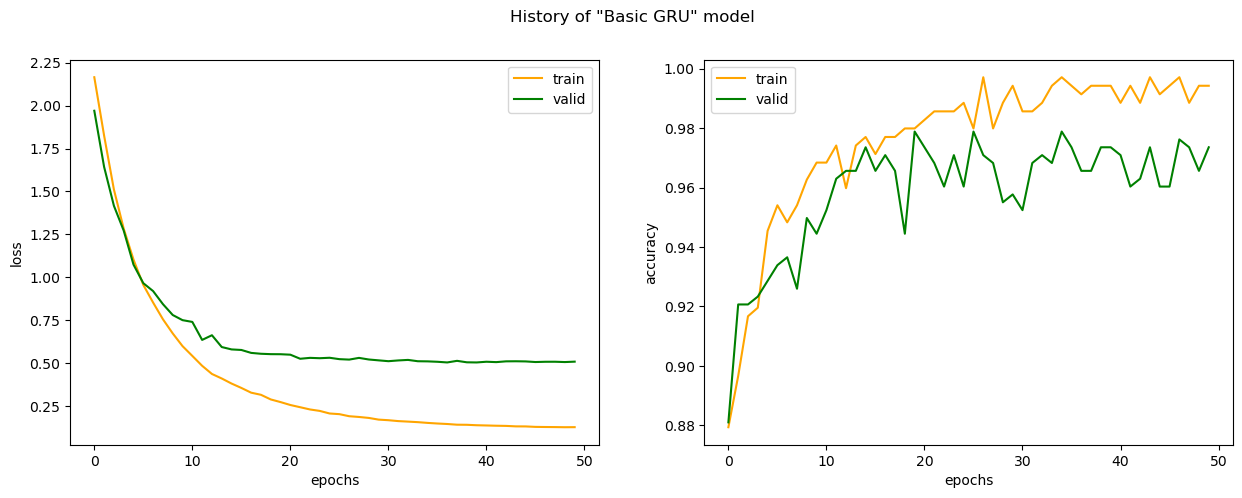

In [37]:
history_plot(losses_Basic_GRU, accuracies_Basic_GRU, 'Basic GRU')

### LSTM:

### Создадим экзепмляр модели.

In [38]:
model_Basic_LSTM = RNN_UWB_Model(
                                input_dim = 189,     # входная размерность.
                                hidden_dim = 512,    # скрытая размерность.
                                num_classes = 12,    # Кол-во классов для предсказания.
                                num_rnn_layers = 1,  # Кол-во рекуррентных слоев модели. 
                                p_dropout = 0.1,     # Вероятность обнуления для каждого элемента входного тензора слоя nn.Dropout.
                                rnn_type = 'lstm',    # Тип rnn слоя.
                                isBidirectional = False,  # Реккурентный слой двунаправленный ?
                                aggregation_type = 'max').to(device) # Тип агрегации скрытых слоёв.

# Функция потерь "CrossEntropyLoss".
criterion_Basic_LSTM = nn.CrossEntropyLoss()

LR = 0.001
# Коэфицент уменьшения LR по эпохам.
SCHEDULER_LAMBDA_PARAM = 0.9
# Оптимизатор.
optimizer_Basic_LSTM = torch.optim.Adam(model_Basic_LSTM.parameters(), lr=LR)
# Планировщик уменьшения коэфицента LR.
lambda_scheduler = lambda x: SCHEDULER_LAMBDA_PARAM ** x
scheduler_Basic_LSTM = torch.optim.lr_scheduler.LambdaLR(optimizer_Basic_LSTM, lr_lambda=lambda_scheduler)

### Обучим модель.

In [39]:
epochs = 50

losses_Basic_LSTM, accuracies_Basic_LSTM = train( model = model_Basic_LSTM,         # Модель
                                                criterion = criterion_Basic_LSTM,     # Функция потерь
                                                optimizer = optimizer_Basic_LSTM, # оптимизатор 
                                                num_epochs = epochs,          # Кол-во эпох
                                                train_loader = train_loader, # Тренировочные данные
                                                val_loader = test_loader,    # Валидационные данные
                                                scheduler = scheduler_Basic_LSTM, # планировщик уменьшения коэфицента LR
                                                scheduler_step = 1) # Шаг уменьшения коэфицента LR по эпохам.

Training epoch 0:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 1 Scheduler LR 0.001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 1: 
*TRAIN loss: 2.2224737126815888 *TRAIN Accuracy: 0.8563218116760254 
*EVAL loss: 2.0101684082915425 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 1:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 2 Scheduler LR 0.0009000000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 2: 
*TRAIN loss: 1.906581901201483 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.771021844015984 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 2:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 3 Scheduler LR 0.0008100000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 3: 
*TRAIN loss: 1.728751222148592 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.6477527642652425 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 3:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 4 Scheduler LR 0.0007290000000000002


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 4: 
*TRAIN loss: 1.5267352300974157 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4894113239006406 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 4:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 5 Scheduler LR 0.0006561000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 5: 
*TRAIN loss: 1.4232472771395508 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.383130054210246 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 5:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 6 Scheduler LR 0.00059049


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 6: 
*TRAIN loss: 1.3246303566469575 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.3090983250205737 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 6:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 7 Scheduler LR 0.000531441


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 7: 
*TRAIN loss: 1.23338035510179 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2252257492065906 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 7:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 8 Scheduler LR 0.0004782969000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 8: 
*TRAIN loss: 1.130839341590464 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.1471497017575771 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 8:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 9 Scheduler LR 0.0004304672100000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 9: 
*TRAIN loss: 1.0432335509451758 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.0606520090413047 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 9:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 10 Scheduler LR 0.0003874204890000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 10: 
*TRAIN loss: 0.9451680457419321 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 0.9829780625127023 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 10:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 11 Scheduler LR 0.0003486784401000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 11: 
*TRAIN loss: 0.8498999605035473 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 0.9094736959856209 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 11:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 12 Scheduler LR 0.0003138105960900001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 12: 
*TRAIN loss: 0.7647594853253032 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 0.8068888025617291 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 12:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 13 Scheduler LR 0.0002824295364810001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 13: 
*TRAIN loss: 0.7083725117740071 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 0.8193278777381724 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 13:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 14 Scheduler LR 0.0002541865828329001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 14: 
*TRAIN loss: 0.6382757946900511 *TRAIN Accuracy: 0.9655172228813171 
*EVAL loss: 0.7387393357647685 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 14:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 15 Scheduler LR 0.0002287679245496101


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 15: 
*TRAIN loss: 0.5724528549942426 *TRAIN Accuracy: 0.9683908224105835 
*EVAL loss: 0.7204444730299322 *EVAL Accuracy: 0.9550264477729797 
 ----------------------------------------------------------------------------------------------------


Training epoch 15:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 16 Scheduler LR 0.0002058911320946491


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 16: 
*TRAIN loss: 0.5269195675146169 *TRAIN Accuracy: 0.9683908224105835 
*EVAL loss: 0.7257966913713365 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 16:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 17 Scheduler LR 0.00018530201888518417


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 17: 
*TRAIN loss: 0.49425147765137883 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 0.6692477931068503 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 17:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 18 Scheduler LR 0.00016677181699666576


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 18: 
*TRAIN loss: 0.4556423036884641 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 0.6514272959247709 *EVAL Accuracy: 0.9629629254341125 
 ----------------------------------------------------------------------------------------------------


Training epoch 18:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 19 Scheduler LR 0.00015009463529699917


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 19: 
*TRAIN loss: 0.419786435592339 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 0.6038058601411347 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 19:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 20 Scheduler LR 0.0001350851717672993


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 20: 
*TRAIN loss: 0.40033107741263424 *TRAIN Accuracy: 0.9741379022598267 
*EVAL loss: 0.6285056069940518 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 20:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 21 Scheduler LR 0.00012157665459056935


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 21: 
*TRAIN loss: 0.3799989916081071 *TRAIN Accuracy: 0.982758641242981 
*EVAL loss: 0.5825055393281006 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 21:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 22 Scheduler LR 0.00010941898913151242


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 22: 
*TRAIN loss: 0.356048128122984 *TRAIN Accuracy: 0.9741379022598267 
*EVAL loss: 0.5744574835548056 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 22:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 23 Scheduler LR 9.847709021836118e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 23: 
*TRAIN loss: 0.33518393532393315 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5926099816904257 *EVAL Accuracy: 0.9682539105415344 
 ----------------------------------------------------------------------------------------------------


Training epoch 23:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 24 Scheduler LR 8.862938119652506e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 24: 
*TRAIN loss: 0.32197232508049833 *TRAIN Accuracy: 0.977011501789093 
*EVAL loss: 0.5790763591323969 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 24:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 25 Scheduler LR 7.976644307687256e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 25: 
*TRAIN loss: 0.3045199941443096 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5583592330668474 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 25:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 26 Scheduler LR 7.17897987691853e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 26: 
*TRAIN loss: 0.290422459176398 *TRAIN Accuracy: 0.982758641242981 
*EVAL loss: 0.5798643937073387 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 26:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 27 Scheduler LR 6.461081889226677e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 27: 
*TRAIN loss: 0.2892115541231324 *TRAIN Accuracy: 0.9741379022598267 
*EVAL loss: 0.5560980424826667 *EVAL Accuracy: 0.9576719403266907 
 ----------------------------------------------------------------------------------------------------


Training epoch 27:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 28 Scheduler LR 5.8149737003040094e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 28: 
*TRAIN loss: 0.27240976804389777 *TRAIN Accuracy: 0.9655172228813171 
*EVAL loss: 0.558015909823218 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 28:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 29 Scheduler LR 5.233476330273609e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 29: 
*TRAIN loss: 0.2604325297072622 *TRAIN Accuracy: 0.982758641242981 
*EVAL loss: 0.5572822001375791 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 29:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 30 Scheduler LR 4.7101286972462485e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 30: 
*TRAIN loss: 0.2507311654626662 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5526594285590174 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 30:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 31 Scheduler LR 4.239115827521624e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 31: 
*TRAIN loss: 0.24381677748348773 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5654231766857187 *EVAL Accuracy: 0.9682539105415344 
 ----------------------------------------------------------------------------------------------------


Training epoch 31:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 32 Scheduler LR 3.8152042447694614e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 32: 
*TRAIN loss: 0.2367658969654399 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5699464923610247 *EVAL Accuracy: 0.952380895614624 
 ----------------------------------------------------------------------------------------------------


Training epoch 32:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 33 Scheduler LR 3.433683820292515e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 33: 
*TRAIN loss: 0.22800464502124976 *TRAIN Accuracy: 0.9798850417137146 
*EVAL loss: 0.5485436831563604 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 33:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 34 Scheduler LR 3.090315438263264e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 34: 
*TRAIN loss: 0.22354018970420303 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5363207343602833 *EVAL Accuracy: 0.9841269254684448 
 ----------------------------------------------------------------------------------------------------


Training epoch 34:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 35 Scheduler LR 2.7812838944369376e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 35: 
*TRAIN loss: 0.22060591446239686 *TRAIN Accuracy: 0.9885057210922241 
*EVAL loss: 0.5375270936896093 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 35:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 36 Scheduler LR 2.5031555049932436e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 36: 
*TRAIN loss: 0.21392912759735117 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5544215836558197 *EVAL Accuracy: 0.9656084179878235 
 ----------------------------------------------------------------------------------------------------


Training epoch 36:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 37 Scheduler LR 2.2528399544939195e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 37: 
*TRAIN loss: 0.20766514845237213 *TRAIN Accuracy: 0.9741379022598267 
*EVAL loss: 0.5399122156855533 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 37:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 38 Scheduler LR 2.0275559590445276e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 38: 
*TRAIN loss: 0.20440277228664155 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5422777580639196 *EVAL Accuracy: 0.9682539105415344 
 ----------------------------------------------------------------------------------------------------


Training epoch 38:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 39 Scheduler LR 1.824800363140075e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 39: 
*TRAIN loss: 0.2013008064899104 *TRAIN Accuracy: 0.982758641242981 
*EVAL loss: 0.5348471956947457 *EVAL Accuracy: 0.952380895614624 
 ----------------------------------------------------------------------------------------------------


Training epoch 39:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 40 Scheduler LR 1.6423203268260675e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 40: 
*TRAIN loss: 0.197079538905105 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5345809288424715 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 40:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 41 Scheduler LR 1.4780882941434608e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 41: 
*TRAIN loss: 0.19417796297102224 *TRAIN Accuracy: 0.977011501789093 
*EVAL loss: 0.5336574432935914 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 41:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 42 Scheduler LR 1.3302794647291146e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 42: 
*TRAIN loss: 0.19088606424477536 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5371507208120467 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 42:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 43 Scheduler LR 1.1972515182562033e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 43: 
*TRAIN loss: 0.18923696676893903 *TRAIN Accuracy: 0.9942528605461121 
*EVAL loss: 0.5368667854171856 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 43:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 44 Scheduler LR 1.077526366430583e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 44: 
*TRAIN loss: 0.18621685792435375 *TRAIN Accuracy: 0.982758641242981 
*EVAL loss: 0.5363553300342428 *EVAL Accuracy: 0.9708994626998901 
 ----------------------------------------------------------------------------------------------------


Training epoch 44:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 45 Scheduler LR 9.697737297875246e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 45: 
*TRAIN loss: 0.1834498841272957 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5329705986527113 *EVAL Accuracy: 0.9735449552536011 
 ----------------------------------------------------------------------------------------------------


Training epoch 45:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 46 Scheduler LR 8.727963568087722e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 46: 
*TRAIN loss: 0.182930262393314 *TRAIN Accuracy: 0.982758641242981 
*EVAL loss: 0.5316406684472048 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 46:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 47 Scheduler LR 7.85516721127895e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 47: 
*TRAIN loss: 0.1801887599671511 *TRAIN Accuracy: 0.9913793206214905 
*EVAL loss: 0.5336004105169052 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 47:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 48 Scheduler LR 7.069650490151056e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 48: 
*TRAIN loss: 0.1782045282396189 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5407479915004338 *EVAL Accuracy: 0.976190447807312 
 ----------------------------------------------------------------------------------------------------


Training epoch 48:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 49 Scheduler LR 6.36268544113595e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 49: 
*TRAIN loss: 0.17819956941425125 *TRAIN Accuracy: 0.9971264600753784 
*EVAL loss: 0.5336260463396203 *EVAL Accuracy: 0.9629629254341125 
 ----------------------------------------------------------------------------------------------------


Training epoch 49:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 50 Scheduler LR 5.726416897022355e-06


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 50: 
*TRAIN loss: 0.1764479696745021 *TRAIN Accuracy: 0.9856321811676025 
*EVAL loss: 0.5355739888056597 *EVAL Accuracy: 0.9576719403266907 
 ----------------------------------------------------------------------------------------------------


### История обучения:

Лучшая accuracy на валидации: 98.41


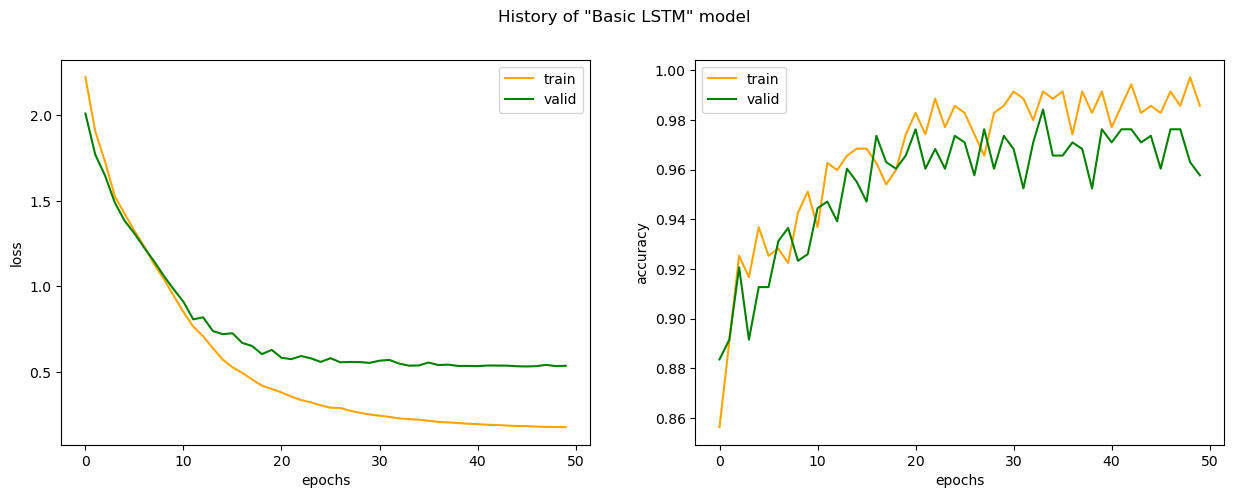

In [40]:
history_plot(losses_Basic_LSTM, accuracies_Basic_LSTM, 'Basic LSTM')

<h3 style="text-align: left;"><b>4.2 Предсказание для отдельного экземпляра из тестовой выборки:</b></h3>


In [89]:
def predict(model, image_example) -> float:
    # Переводим модель в режим для оценки предсказаний
    model.eval()
    # Без расчёта производных.
    with torch.no_grad():
        # Передадим данные в модель, посчитаем логиты предсказаний для всех классов.
        logits = model(torch.from_numpy(image_example).reshape(-1, 90, 189).to(torch.float32).to(device))

        # Индексы предсказаных классов (от 0 до 11).
        idx = logits.argmax(dim=1)
        # Создаем нулевой тензор той же формы, что и logits.
        binary_logits = torch.zeros_like(logits, dtype=torch.int64).to(device)
        # По индексу на место предсказаного класса ставив '1' в нулевой тензор.
        for i, bl in enumerate(binary_logits):
            bl[idx[i]] = 1

    # Вернём предсказания
    return binary_logits

In [94]:
# Изображение, которое будем классифицировать.
image_example = Radar_test.reshape(-1, 1, 90, 189)[122]
# Правильный ответ.
label_example = Labels_test[122]
print(f'Правильный ответ: {label_example}')

Правильный ответ: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


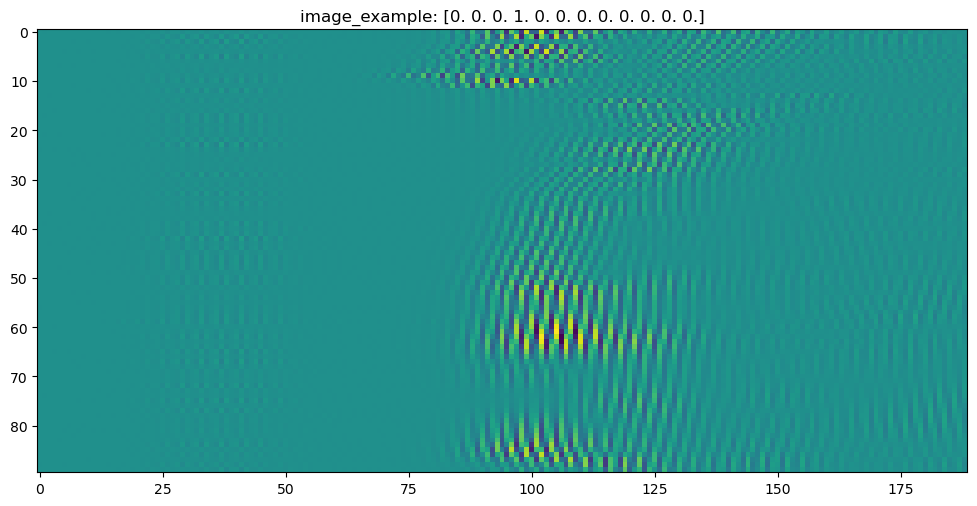

In [95]:
# Изображение, которое будем классифицировать.
imshow(image_example, 0, f'image_example: {label_example}')

In [99]:
predicted_logits_RNN = predict(model_Basic_RNN, image_example)
print(f'Правильный ответ: {label_example}')
print(f'Ответ RNN: {predicted_logits_RNN}')

Правильный ответ: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Ответ RNN: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], device='cuda:0')


In [100]:
predicted_logits_GRU = predict(model_Basic_GRU, image_example)
print(f'Правильный ответ: {label_example}')
print(f'Ответ GRU: {predicted_logits_GRU}')

Правильный ответ: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Ответ GRU: tensor([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')


In [105]:
predicted_logits_LSTM = predict(model_Basic_LSTM, image_example)
print(f'Правильный ответ: {label_example}')
print(f'Ответ LSTM: {predicted_logits_LSTM}')

Правильный ответ: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Ответ LSTM: tensor([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')


In [ ]:
torch.cuda.empty_cache()